# Measure network latency for trivial request

In [1]:
import os
import time
import json

import numpy as np
import matplotlib.pyplot as plt
from openai import OpenAI

In [2]:
client = OpenAI()

## Data collection
(skip - will overwrite existing data)

In [ ]:
network_times = []
n = 200

for i in range(n):
    if i % 10 == 0:
        print(f"\tIteration: {i}/{n}")

    start = time.time()
    client.models.list()
    stop = time.time()

    network_times.append(stop-start)

file_name = "network_times.json"
with open(file_name, "w") as jf:
    json.dump(network_times, jf)

### Analyze data

In [4]:
file_name = "network_times.json"

with open(file_name, "r") as jf:
    network_times = json.load(jf)

print(f"{len(network_times)} data points collected")

200 data points collected


In [5]:
# remove outliers
data_array = np.array(network_times)
upper_bound = np.quantile(data_array, 0.95)
filtered_times = data_array[data_array <= upper_bound]

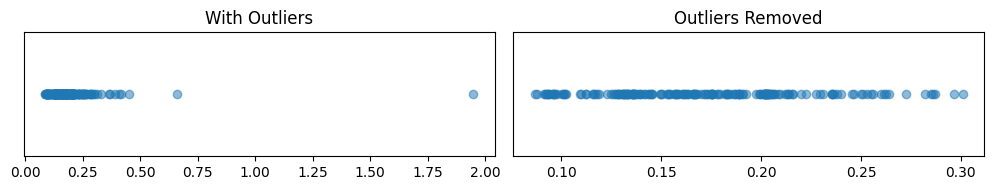

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2), sharey=True)

# Plot with outliers
axes[0].plot(network_times, [1]*len(network_times), 'o', alpha=0.5)
axes[0].set_title("With Outliers")

# Plot without outliers
axes[1].plot(filtered_times, [1]*len(filtered_times), 'o', alpha=0.5)
axes[1].set_title("Outliers Removed")

for ax in axes:
    ax.set_yticks([])

plt.tight_layout()

In [7]:
network_latency = np.quantile(network_times, 0.1)
print("Network latency, 10% quantile:", round(network_latency, 4))

Network latency, 10% quantile: 0.1086
